### 1. Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from lib.cluster import kmeans, find_best_cluster, feature_importance, plot_kmeans_cluster

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 2. Load Data

In [2]:
file_loc = "data/old/player_stats_final.csv"

df = pd.read_csv(file_loc)
df.head()

,Player,Age,Height,Weight,Pos,MP,FG,FGA,FG%,3P,...,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DPM,BPM
0,aaron brooks,32,73,161,PG,21.9,3.7,9.0,0.413,1.3,...,6.9,4.5,23.8,1.4,0.5,14.4,23.3,0,-2.4,-1.7
1,aaron gordon,21,81,220,SF,23.2,3.4,7.4,0.451,0.6,...,17.8,12.3,9.8,1.4,2.0,9.6,17.8,0,0.4,-0.2
2,aaron harrison,22,78,210,SG,4.2,0.2,0.9,0.217,0.1,...,14.0,8.9,6.0,2.7,0.0,12.1,13.6,0,-0.2,-6.4
3,adreian payne,25,82,237,PF,13.7,1.7,4.2,0.399,0.1,...,19.4,12.8,7.4,1.5,1.5,16.4,17.8,0,-0.8,-5.8
4,al horford,30,82,245,C,33.4,6.1,11.6,0.529,0.3,...,22.1,15.1,14.7,1.3,2.9,11.1,19.6,0,2.2,3.0


In [3]:
df.columns

Index([u'Player', u'Age', u'Height', u'Weight', u'Pos', u'MP', u'FG', u'FGA',
       u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%', u'FT',
       u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV',
       u'Fouls', u'PTS', u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft',
       u'%FGA_3-10ft', u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'%ASTd_2P', u'%FGA_DUNK',
       u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3', u'PER', u'TS%', u'3PAr',
       u'FTr', u'ORB%', u'DRB%', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%',
       u'USG%', u'OBPM', u'DPM', u'BPM'],
      dtype='object')

In [4]:
df.drop(['MP', '3PAr'], axis=1, inplace=True)

In [5]:
df.shape

(453, 57)

### 3. Data Preprocessing

#### Scale the data

In [6]:
X = df.drop(['Player', 'Pos'], axis=1)
# y = test_df['Pos']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Dimensionality Reduction

#### t-distributed Stochastic Neighbor Embedding (TSNE)

TSNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [8]:
# from sklearn.manifold import TSNE

In [9]:
# model = TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)

# X_tsne = model.fit_transform(X_scaled) 

#### Principal Component Analysis

In [10]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}").format(str(X_scaled.shape))
print("Reduced shape: {}").format(str(X_pca.shape))

Original shape: (453, 55)
Reduced shape: (453, 2)


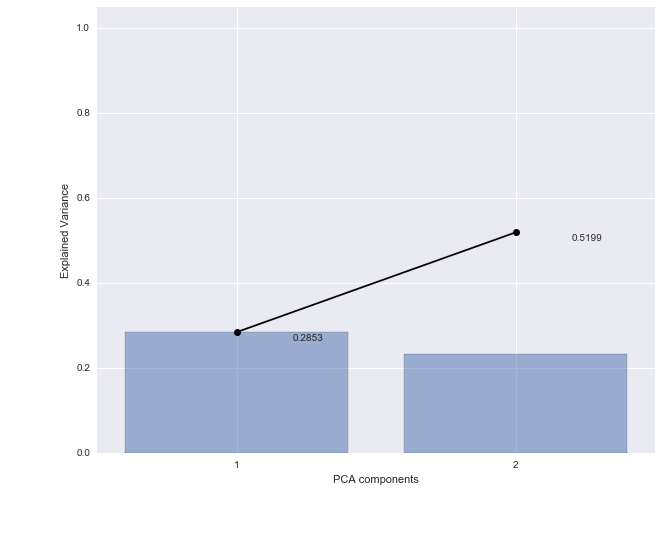

In [11]:
# Plot Cumulative Explained Variance
x = np.arange(1,3)
plt.figure(figsize=(10,8))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

plt.ylim(0, 1.05)
plt.annotate('Cumulative \nexplained \nvariance',
             xy=(15,.85), arrowprops=dict(arrowstyle='->'), xytext=(13, .6))

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xticks(range(1,3))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### 5. Measuring KMeans Silhouette Score to Find Best Cluster

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

#### Number of Clusters

best silhouette score: 0.372774492217


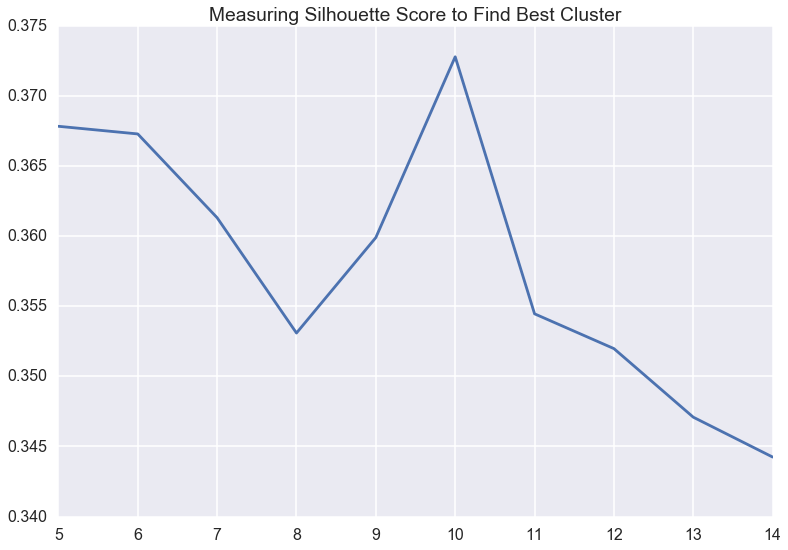

In [12]:
# this plot measures the silhouette scores of clusters
find_best_cluster(X_pca,5,15)

### 6. Clustering

#### KMeans

In [14]:
kmeans_PCA = kmeans(X_pca, 10)

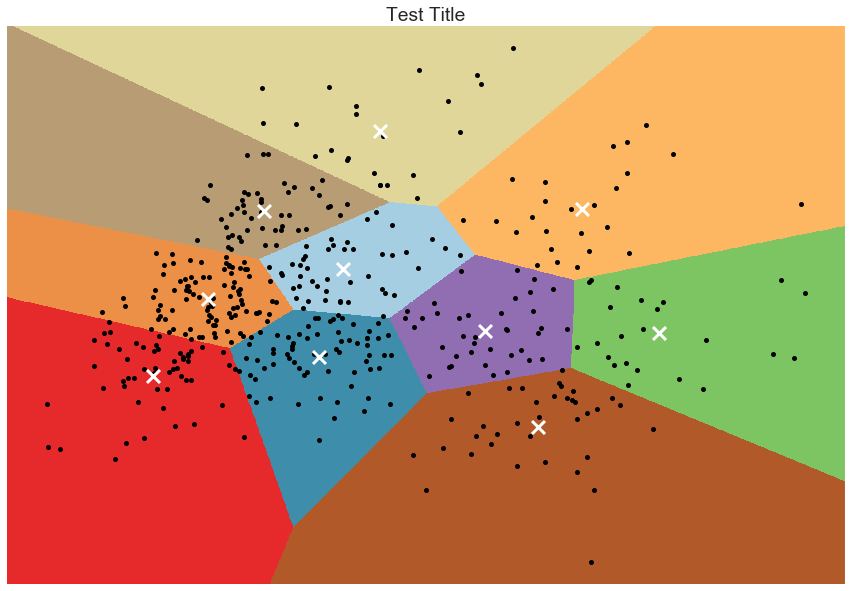

In [16]:
plot_kmeans_cluster(X_pca, k_clusters=10, plot_title="""Test Title""")

In [17]:
print "PCA silhouette score:", kmeans_PCA['silhouette_score']

PCA silhouette score: 0.372774492217


In [18]:
df['PCA_labels'] = kmeans_PCA['labels']

In [19]:
df.head()

,Player,Age,Height,Weight,Pos,FG,FGA,FG%,3P,3PA,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DPM,BPM,PCA_labels
0,aaron brooks,32,73,161,PG,3.7,9.0,0.413,1.3,3.6,...,4.5,23.8,1.4,0.5,14.4,23.3,0,-2.4,-1.7,1
1,aaron gordon,21,81,220,SF,3.4,7.4,0.451,0.6,2.1,...,12.3,9.8,1.4,2.0,9.6,17.8,0,0.4,-0.2,2
2,aaron harrison,22,78,210,SG,0.2,0.9,0.217,0.1,0.5,...,8.9,6.0,2.7,0.0,12.1,13.6,0,-0.2,-6.4,8
3,adreian payne,25,82,237,PF,1.7,4.2,0.399,0.1,0.5,...,12.8,7.4,1.5,1.5,16.4,17.8,0,-0.8,-5.8,3
4,al horford,30,82,245,C,6.1,11.6,0.529,0.3,0.8,...,15.1,14.7,1.3,2.9,11.1,19.6,0,2.2,3.0,5


In [54]:
mask = (df['PCA_labels'] == 5)

df[mask][['Player']].head(20)

,Player
4,al horford
5,al jefferson
26,anthony davis
38,blake griffin
51,brook lopez
88,david lee
89,david west
95,demarcus cousins
102,derrick favors
118,dwight howard


In [55]:
cluster_data = df[mask].drop(['Player', 'Pos', 'PCA_labels'], axis=1)
league_data = df.drop(['Player', 'Pos', 'PCA_labels'], axis=1)
feature_importance(cluster_data, league_data)

,Feature,Importance,Cluster Average,League Average
27,%FGA_0-3ft,0.171000,0.383071,0.326980
26,%FGA_2P,0.152103,0.931857,0.729865
5,FG%,0.091556,0.502000,0.452949
48,STL%,0.088792,1.489286,1.592715
37,%FGA_DUNK,0.083220,0.088893,0.065433
50,TOV%,0.081011,12.517857,13.125166
11,2P%,0.047679,0.513643,0.484724
20,STL,0.045436,0.892857,0.675497
36,%ASTd_2P,0.039026,0.598536,0.529898
53,DPM,0.029519,1.428571,-0.218543


- PCA_0: Backup Guards
- PCA_1: Backup Centers
- PCA_2: Shooting Wings
- PCA_3: Playmaking Guards
- PCA_4: Interior Finishers
- PCA_5: Offensive Forwards
- PCA_6: Backup Forwards
- PCA_7: Defensive Centers
- PCA_8: Offensive Wings
- PCA_9: Defensive Wings
